In [1]:
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns

In [2]:
SQL_SOURCE = 'https://fernando-melchor.carto.com/api/v2/sql'

In [3]:
def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

In [4]:
NYCshapeQuery = '''
SELECT *
FROM nyc_zip_code
'''
NYCshapeStream = queryCartoDB(NYCshapeQuery, format = 'GeoJSON')
NYCshapeData   = json.loads(NYCshapeStream.read())
NYCshape     = gpd.GeoDataFrame.from_features(NYCshapeData['features'])

NYCshape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
#NYCshape.to_crs(epsg = 2263, inplace = True) # from ft2 to mi2 


NYCshape.head()

,bldgpostalcode,borough,cartodb_id,column_1485635422878,cty_fips,geometry,id,objectid,po_name,postalcode,shape_area,shape_leng,st_fips,state
0,0,Queens,27,None,081,"(POLYGON ((-73.844302 40.689443, -73.837543999...",http://nyc.pediacities.com/Resource/PostalCode...,27,Ozone Park,11416,1.885485e+07,21630.675484,36,NY
1,0,Brooklyn,28,None,047,"(POLYGON ((-73.93822299999999 40.683893, -73.9...",http://nyc.pediacities.com/Resource/PostalCode...,28,Brooklyn,11233,3.787169e+07,30234.156913,36,NY
2,0,Brooklyn,31,None,047,"(POLYGON ((-73.902941 40.67084, -73.902227 40....",http://nyc.pediacities.com/Resource/PostalCode...,31,Brooklyn,11212,4.197210e+07,26621.841578,36,NY
3,0,Bronx,41,None,005,"(POLYGON ((-73.84463599999999 40.904751, -73.8...",http://nyc.pediacities.com/Resource/PostalCode...,41,Bronx,10466,5.526249e+07,35358.303139,36,NY
4,0,Manhattan,48,None,061,"(POLYGON ((-73.915441 40.875591, -73.915087 40...",http://nyc.pediacities.com/Resource/PostalCode...,48,Bronx,10463,3.119702e+06,7791.517127,36,NY


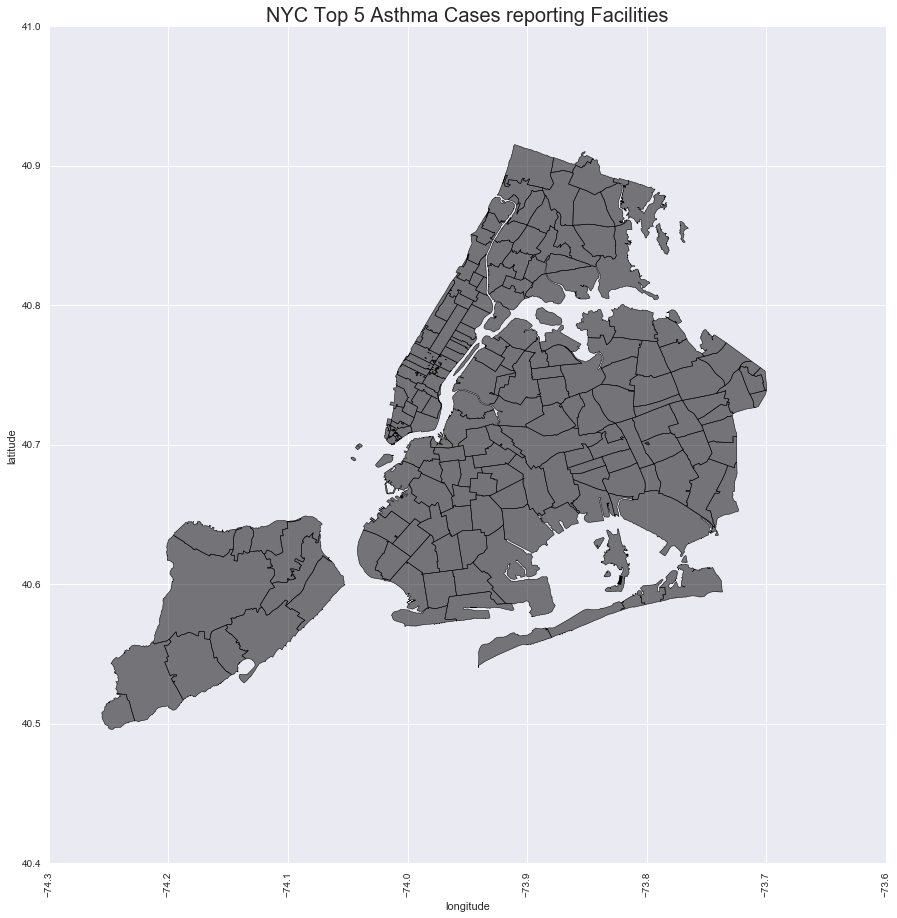

In [5]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax)

pl.xlabel('longitude')
pl.ylabel('latitude')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Top 5 Asthma Cases reporting Facilities", size=20)

In [6]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Subway Lines.geojson')
fname = 'Subway Lines.geojson'
print (fname)
subline = gpd.GeoDataFrame.from_file('Subway Lines.geojson')


Subway Lines.geojson


In [7]:
subline.crs = from_epsg(4326) #= from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
#NYCshape.to_crs(epsg = 2263, inplace = True) # from ft2 to mi2 


In [8]:
subline.head()

,geometry,id,name,objectid,rt_symbol,shape_len,url
0,LINESTRING (-73.99487524803018 40.680203546062...,2000393,G,753,G,2438.20024902,http://web.mta.info/nyct/service/
1,LINESTRING (-73.97957543205142 40.659930695530...,2000394,G,754,G,3872.83441063,http://web.mta.info/nyct/service/
2,LINESTRING (-73.97585637503069 40.575974505394...,2000469,Q,755,N,1843.36633108,http://web.mta.info/nyct/service/
3,LINESTRING (-73.92414355434534 40.752290926571...,2000294,M,756,B,1919.5592029,http://web.mta.info/nyct/service/
4,LINESTRING (-73.91344685471373 40.756171576368...,2000296,M,757,B,2385.69853589,http://web.mta.info/nyct/service/


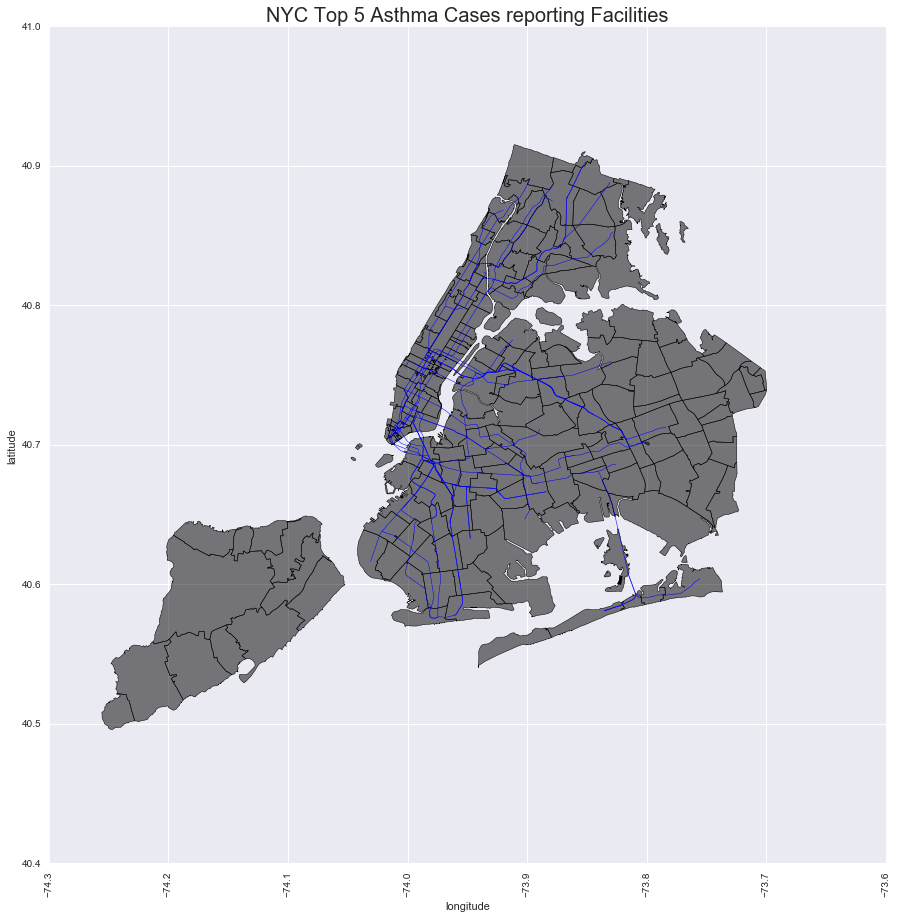

In [9]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax)
subline.plot(linewidth = 0.5, color = 'b', ax = ax)
pl.xlabel('longitude')
pl.ylabel('latitude')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Top 5 Asthma Cases reporting Facilities", size=20)

In [10]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='Subway Stations.geojson')
fname = 'Subway Stations.geojson'
print (fname)
subStations = gpd.GeoDataFrame.from_file('Subway Stations.geojson')

Subway Stations.geojson


In [11]:
subStations.crs = from_epsg(4326)

In [12]:
subStations.head()

,geometry,line,name,notes,objectid,url
0,POINT (-73.99106999861967 40.73005400028978),4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1,http://web.mta.info/nyct/service/
1,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2,http://web.mta.info/nyct/service/
2,POINT (-73.98384899986625 40.76172799961419),1-2,50th St,"1-all times, 2-nights",3,http://web.mta.info/nyct/service/
3,POINT (-73.97499915116808 40.68086213682956),2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4,http://web.mta.info/nyct/service/
4,POINT (-73.89488591154061 40.66471445143568),3-4,Pennsylvania Ave,"4-nights, 3-all other times",5,http://web.mta.info/nyct/service/


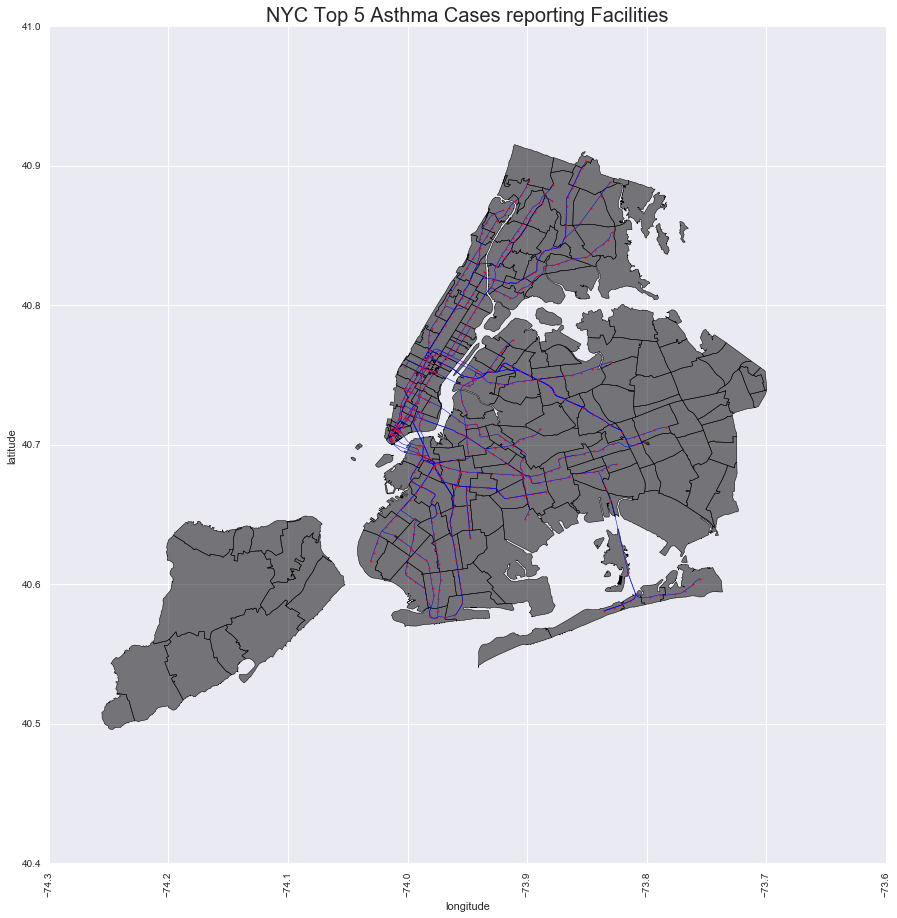

In [13]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax)
subline.plot(linewidth = 0.5, color = 'b', ax = ax)
subStations.plot(linewidth = 0.5, color = 'r', ax = ax)
pl.xlabel('longitude')
pl.ylabel('latitude')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Top 5 Asthma Cases reporting Facilities", size=20)

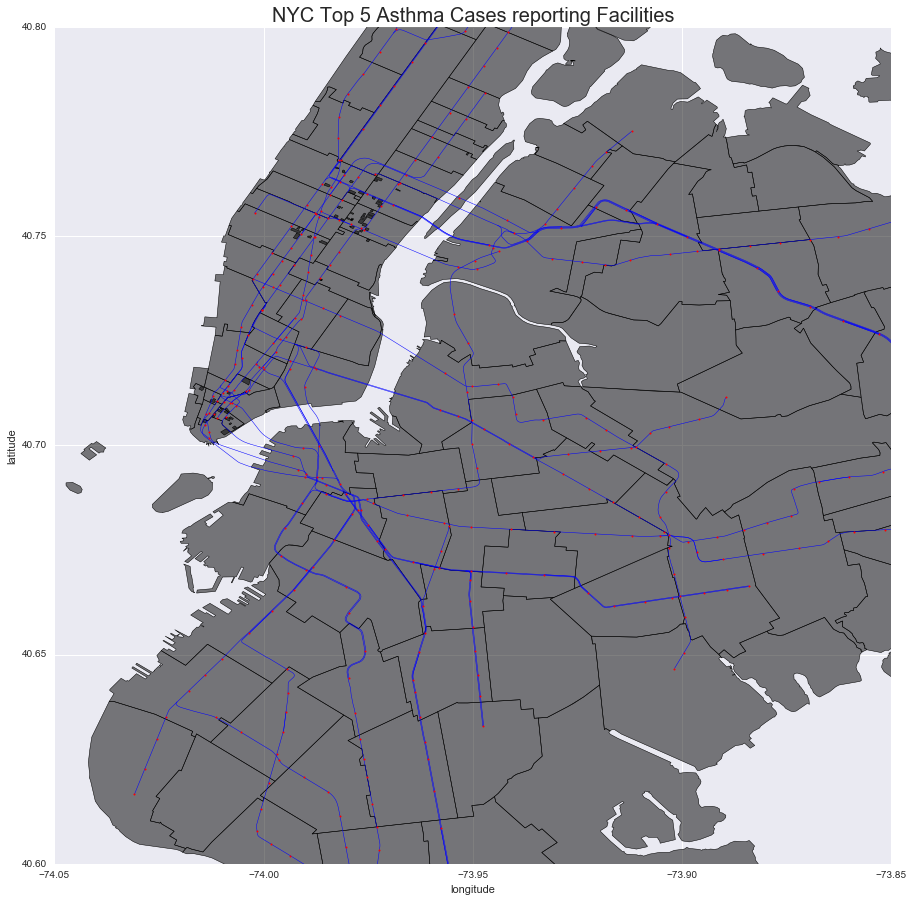

In [14]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax)
subline.plot(linewidth = 0.5, color = 'b', ax = ax)
subStations.plot(linewidth = 0.5, color = 'r', ax = ax)
pl.xlabel('longitude')
pl.ylabel('latitude')
pl.ylim(40.6, 40.8)
pl.xlim(-74.05, -73.85)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Top 5 Asthma Cases reporting Facilities", size=20)

In [15]:
fileUrl = 'https://data.cityofnewyork.us/api/geospatial/v2h8-6mxf?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(fileUrl, filename='NYCCensusBlocks.geojson')
fname = 'NYCCensusBlocks.geojson'
print (fname)
CensusBlocks = gpd.GeoDataFrame.from_file('NYCCensusBlocks.geojson')

NYCCensusBlocks.geojson


In [16]:
CensusBlocks.head()

,bctcb_2010,boro_code,boro_name,cb_2010,ct_2010,geometry,shape_area,shape_leng
0,50009001000,5,Staten Island,1000,000900,(POLYGON ((-74.07920577013245 40.6434307837456...,244589.603884,2508.94811457
1,50020011000,5,Staten Island,1000,002001,(POLYGON ((-74.07061992438017 40.6108550670541...,111006.286826,1345.88642172
2,50027001000,5,Staten Island,1000,002700,(POLYGON ((-74.07524403910642 40.6260063245271...,150406.766022,1703.38117241
3,50040001000,5,Staten Island,1000,004000,(POLYGON ((-74.08708799689826 40.6111688312392...,141296.561149,1511.17374266
4,50064001000,5,Staten Island,1000,006400,(POLYGON ((-74.07643744511992 40.6010016065558...,200784.983607,1978.24385199


In [17]:
CensusBlocks.crs

{}

In [18]:
CensusBlocks.crs = from_epsg(4326)
CensusBlocks.crs

{'init': 'epsg:4326', 'no_defs': True}

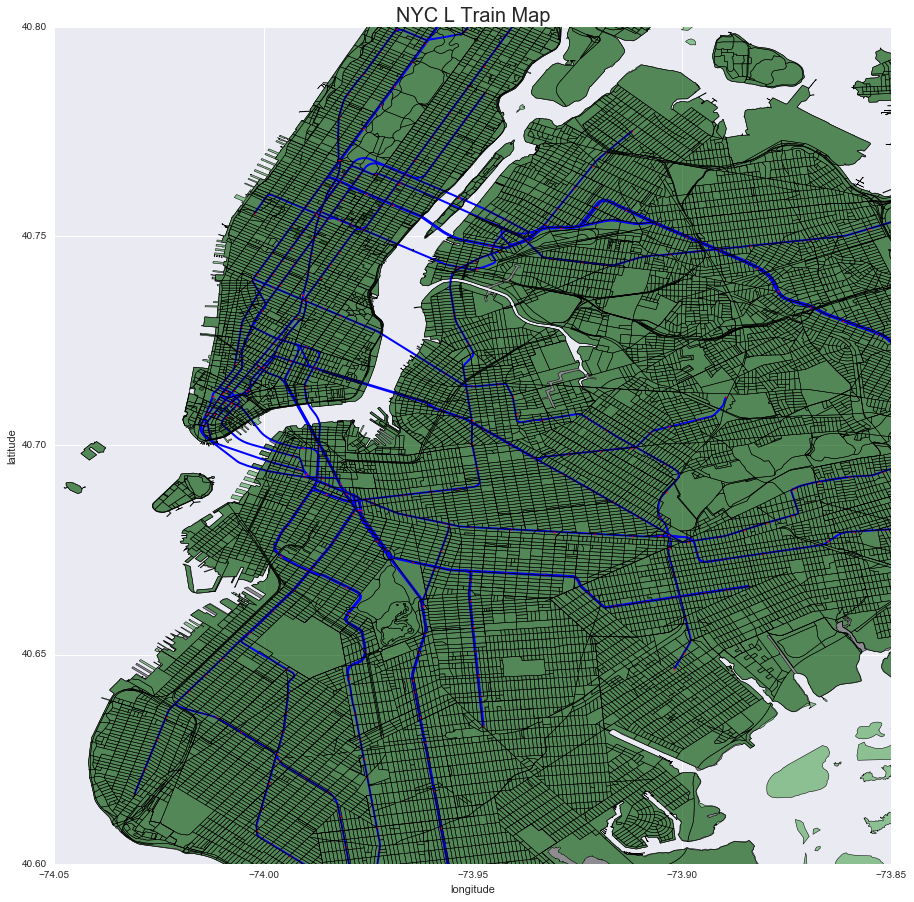

In [19]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax,alpha=.4)
subline.plot(linewidth = 2, color = 'b', ax = ax)
subStations.plot(linewidth = 4, color = 'r', ax = ax)
CensusBlocks.plot(linewidth = 0.5, color = 'g', ax = ax, alpha=.4)
pl.xlabel('longitude')
pl.ylabel('latitude')
pl.ylim(40.6, 40.8)
pl.xlim(-74.05, -73.85)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC L Train Map", size=20)

In [20]:
CensusBlocks['BlockCentroid'] = CensusBlocks['geometry'].centroid

In [21]:
def getXY(pt):
    return pt.x, pt.y

In [22]:
subStations.line.unique()

array([u'4-6-6 Express', u'1-2', u'2-3-4', u'3-4', u'1', u'A-B-C', u'A-C',
       u'E-M-R', u'J-M-Z', u'J-Z', u'B-D-N-Q-R', u'A-S', u'2-5', u'B-D',
       u'7-7 Express', u'6-6 Express', u'4-5-6-6 Express', u'D-N-R',
       u'2-3-4-5', u'4', u'6', u'A', u'B-D-F-M', u'B-Q-S', u'D', u'E',
       u'E-F', u'E-J-Z', u'E-M', u'F', u'G', u'L', u'J', u'J-M', u'N',
       u'N-W', u'N-Q-R-W', u'S', u'Q', u'7-7 Express-N-W', u'F-G', u'B-Q',
       u'D-N-Q-R', u'4-5', u'5', u'1-2-3', u'2-3', u'3', u'7', u'F-Q',
       u'A-C-E', u'M', u'E-F-M-R', u'2', u'A-B-C-D', u'R', u'B-D-E',
       u'N-R-W', u'F-M', u'A-C-G', u'A-C-F', u'N-R', u'R-W', u'N-Q',
       u'A-C-S', u'D-F-N-Q'], dtype=object)

In [23]:
subStations[subStations.line=='L']

,geometry,line,name,notes,objectid,url
71,POINT (-73.95024799996972 40.71407200064717),L,Lorimer St,L-all times,72,http://web.mta.info/nyct/service/
72,POINT (-73.9019160004208 40.66914500061398),L,Sutter Ave,L-all times,73,http://web.mta.info/nyct/service/
73,POINT (-73.90395860491864 40.68886654246024),L,Wilson Ave,L-all times,74,http://web.mta.info/nyct/service/
145,POINT (-73.98168087489128 40.73097497580066),L,1st Ave,L-all times,146,http://web.mta.info/nyct/service/
148,POINT (-73.94049699874644 40.71157600064823),L,Grand St,L-all times,149,http://web.mta.info/nyct/service/
149,POINT (-73.94394399869037 40.71457599836364),L,Graham Ave,L-all times,150,http://web.mta.info/nyct/service/
150,POINT (-73.95666499806525 40.71717399858899),L,Bedford Ave,L-all times,151,http://web.mta.info/nyct/service/
151,POINT (-73.93979284713505 40.70739106438455),L,Montrose Ave,L-all times,152,http://web.mta.info/nyct/service/
193,POINT (-73.9030969995401 40.67534466640805),L,Atlantic Ave,L-all times,194,http://web.mta.info/nyct/service/
210,POINT (-73.90393400118632 40.69551800114878),L,Halsey St,L-all times,211,http://web.mta.info/nyct/service/


In [ ]:
matrix.mapzen.com/one_to_many?json={}&api_key=

print (os.getenv("MAPZENKEY"))
print (os.getenv("MTAKEY"))
print (os.getenv("GOOGLEKEY"))
print (os.getenv("OWMKEY"))

In [ ]:
#whos

matrix.mapzen.com/sources_to_targets?json={"sources":[{"lat":40.744014,"lon":-73.990508},{"lat":40.739735,"lon":-73.979713},{"lat":40.752522,"lon":-73.985015},{"lat":40.750117,"lon":-73.983704},{"lat":40.750552,"lon":-73.993519}],"targets":[{"lat":40.744014,"lon":-73.990508},{"lat":40.739735,"lon":-73.979713},{"lat":40.752522,"lon":-73.985015},{"lat":40.750117,"lon":-73.983704},{"lat":40.750552,"lon":-73.993519}],"costing":"pedestrian"}&id=ManyToMany_NYC_work_dinner&api_key=mapzen-xxxxxx

matrix.mapzen.com/sources_to_targets?json={"sources":
[{"lat":40.744014,"lon":-73.990508},{"lat":40.739735,"lon":-73.979713},{"lat":40.752522,"lon":-73.985015},{"lat":40.750117,"lon":-73.983704},{"lat":40.750552,"lon":-73.993519}],"targets":
[{"lat":40.744014,"lon":-73.990508},{"lat":40.739735,"lon":-73.979713},{"lat":40.752522,"lon":-73.985015},{"lat":40.750117,"lon":-73.983704},{"lat":40.750552,"lon":-73.993519}],
"costing":"pedestrian"}&id=ManyToMany_NYC_work_dinner&api_key=mapzen-xxxxxx

In [ ]:
#! printenv

In [24]:
subStations[subStations.line=='L']['geometry'][-2:-1]

441    POINT (-73.99775078874781 40.73774146981052)
Name: geometry, dtype: object

In [25]:
subStations[subStations.line=='L']['geometry'][441].distance(subStations[subStations.line=='L']['geometry'][442])

0.005238702479814334

In [26]:
from shapely.geometry import LineString

In [27]:
line = LineString([subStations[subStations.line=='L']['geometry'][441], subStations[subStations.line=='L']['geometry'][442]])
line.area


0.0

In [28]:
line.length


0.005238702479814334

In [29]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0


In [30]:
def distance(x,y):
    lat1 = radians(getXY(x)[0])
    lon1 = radians(getXY(x)[1])
    lat2 = radians(getXY(y)[0])
    lon2 = radians(getXY(y)[1])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return (distance)

In [31]:
distance(subStations[subStations.line=='L']['geometry'][441], subStations[subStations.line=='L']['geometry'][442])

0.5405434201754439

In [76]:
CensusBlocks[(CensusBlocks.boro_code=='1') | (CensusBlocks.boro_code=='3') | (CensusBlocks.boro_code=='4')]

,bctcb_2010,boro_code,boro_name,cb_2010,ct_2010,geometry,shape_area,shape_leng,BlockCentroid,OnRangeToL
3097,10005000003,1,Manhattan,0003,000500,(POLYGON ((-74.02020686710532 40.6848338330770...,183471.102412,6870.14004389,POINT (-74.0125722394634 40.68546303664706),False
3098,10002021000,1,Manhattan,1000,000202,(POLYGON ((-73.9799619880113 40.71397269930172...,57115.9140286,1187.88386045,POINT (-73.98035381753292 40.71386121470454),False
3099,10007001000,1,Manhattan,1000,000700,(POLYGON ((-74.00965928671495 40.7087567224859...,71173.1939791,1130.72460149,POINT (-74.01011247802204 40.70865511161053),False
3100,10009001000,1,Manhattan,1000,000900,(POLYGON ((-74.00986580893488 40.7057964266632...,147868.288795,1596.65976687,POINT (-74.01076209747217 40.70557486714767),False
3101,10012001000,1,Manhattan,1000,001200,(POLYGON ((-73.98247747854293 40.7182905071724...,119406.482234,1428.26565607,POINT (-73.98324259809476 40.71786919731522),False
3102,10014011000,1,Manhattan,1000,001401,(POLYGON ((-73.9883662631773 40.71644570203691...,326876.540881,2343.21689659,POINT (-73.98825130733171 40.71575121949154),False
3103,10015021000,1,Manhattan,1000,001502,(POLYGON ((-74.00774466596553 40.7102207739147...,119802.969847,1421.32201894,POINT (-74.00866498746989 40.71022808657338),False
3104,10016001000,1,Manhattan,1000,001600,(POLYGON ((-73.99309432171637 40.7179224787339...,192194.344295,2216.0191299,POINT (-73.99403626024575 40.71689814300859),False
3105,10018001000,1,Manhattan,1000,001800,(POLYGON ((-73.98787935797355 40.7174089725307...,88287.4881612,1218.95689976,POINT (-73.9885166845889 40.71705204023593),False
3106,10021001000,1,Manhattan,1000,002100,(POLYGON ((-74.00754375933072 40.7154328246253...,89149.0726005,1261.2840019,POINT (-74.00838648544598 40.71547252231908),False


In [85]:
indexlist = []
CensusBlocks['OnRangeToL'] = False
for i in CensusBlocks[(CensusBlocks.boro_code=='1') | (CensusBlocks.boro_code=='3')| (CensusBlocks.boro_code=='4')].index:
    block = CensusBlocks.iloc[i].BlockCentroid
    #print (i,block)
    for station in subStations[subStations.line=='L']['geometry']:
        #print (station)
        if i in indexlist:
            break
        else:
            if distance(block,station)<=.8:
                indexlist.append(i)
                #CensusBlocks.iloc[i]['OnRangeToL'] = True
                break

In [86]:
len(indexlist)

3619

In [87]:
CensusBlocks.shape

(38794, 10)

In [88]:
CensusBlocks[(CensusBlocks.boro_code=='1') | (CensusBlocks.boro_code=='3')].shape

(13538, 10)

In [89]:
redoxCensusBlocks = CensusBlocks.iloc[indexlist].copy(deep=True)

In [90]:
redoxCensusBlocks.OnRangeToL = True

In [91]:
redoxCensusBlocks.shape

(3619, 10)

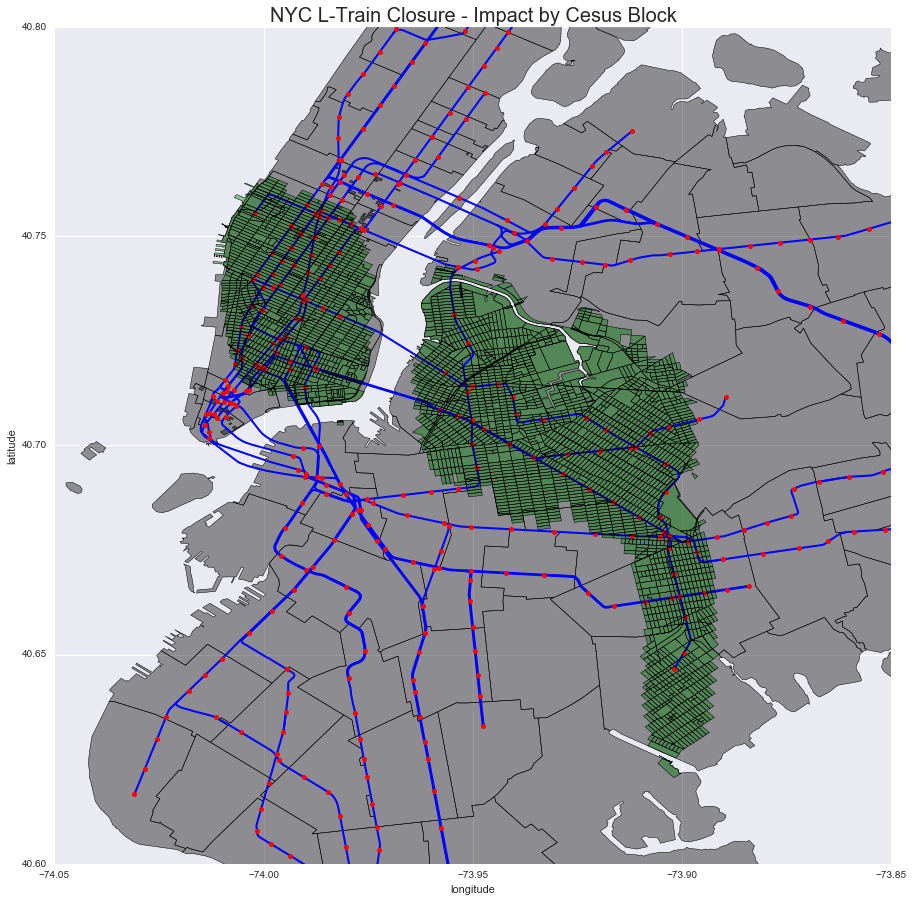

In [95]:
f, ax = pl.subplots(figsize=(15,15))
NYCshape.plot(linewidth = 0.5, color = 'k', ax = ax,alpha=.4)
subline.plot(linewidth = 2, color = 'b', ax = ax)
subStations.plot(marker='o', markersize=5, linewidth = 4, color = 'r', ax = ax)
redoxCensusBlocks.plot(linewidth = 0.5, color = 'g', ax = ax, alpha=.4)
pl.xlabel('longitude')
pl.ylabel('latitude')
pl.ylim(40.6, 40.8)
pl.xlim(-74.05, -73.85)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC L-Train Closure - Impact by Cesus Block", size=20)